# **VideoGeneration UI**

A Google Colab Video Generation UI
<br>

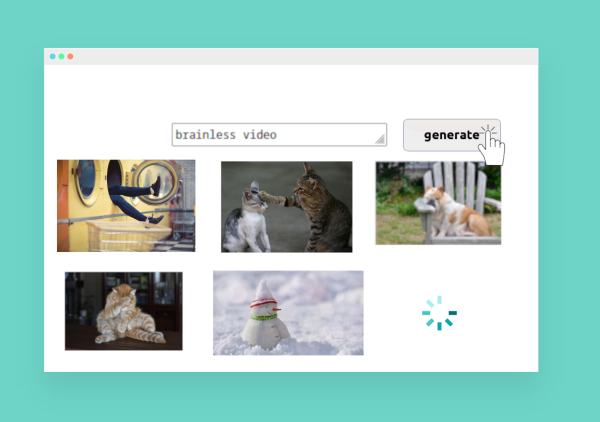

# Instructions
#### - run the cells.
#### - wait for your output video
#### - watch it.

In [1]:
#@title Install packages and download the model
#@markdown <- press to install and prepare the model

!pip -q install torch==2.0.0 git+https://github.com/huggingface/diffusers transformers accelerate imageio[ffmpeg]

import torch
from diffusers import DiffusionPipeline, DPMSolverMultistepScheduler
from diffusers.utils import export_to_video
from IPython.display import HTML
from base64 import b64encode


pipe = DiffusionPipeline.from_pretrained(
    "damo-vilab/text-to-video-ms-1.7b",
    torch_dtype=torch.float16,
    variant="fp16")

pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()
pipe.enable_vae_slicing()
print('DONE!')

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

DONE!


In [4]:
#@title Create the Video and display it
import imageio
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.transform import resize
from IPython.display import HTML

#@title Generate your video and display it
prompt = 'Gorilla boxing with Cristiano Ronaldo' #@param {type:"string"}
negative_prompt = 'ugly' #@param {type:"string"}
video_duration_seconds = 2 #@param {type:"integer"}
frames_per_second = 15 #@param {type:"integer"}
num_frames = video_duration_seconds * frames_per_second
video_frames = pipe(prompt, negative_prompt="low quality", num_inference_steps=25, num_frames=num_frames).frames
video_path = export_to_video(video_frames[0])


def display_video(video):
    fig = plt.figure(figsize=(4.2,4.2))  #Display size specification
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    mov = []
    for i in range(len(video)):  #Append videos one by one to mov
        img = plt.imshow(video[i], animated=True)
        plt.axis('off')
        mov.append([img])

    #Animation creation
    anime = animation.ArtistAnimation(fig, mov, interval=100, repeat_delay=1000)
    plt.close()
    return anime


video = imageio.mimread(video_path)  #Loading video
HTML(display_video(video).to_html5_video())  #Inline video display in HTML5

  0%|          | 0/25 [00:00<?, ?it/s]